### Author:

    HOANG MINH KHIEM - 16520588
    TRAN ANH TUAN - 16521386

### Overview: 
In this assignment, you will need to apply data analytics, using the tools introduced during the labs. You are required to study the SEEK job market data and analyze. The assignment consists of 3 parts. In the first part, you will need to understand data characteristics using data preparation and preprocessing techniques. In the second part, you will perform various data analysis techniques, including exploratory, statistical, and predictive ones. In the third part, you will need to evaluate your findings and determine appropriate future actions.

# Part 2 - Data Analysis and Interpretation:
    ● Perform exploratory data analysis 
    ● Perform statistical data analysis 
    ● Perform predictive data analysis  
    ● Submit your Jupyter notebook in your Github repository

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('data.csv')
df.head()

D:\Apps\Ananconda3.7\Anaconda3.7\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (0,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN


In [2]:
new_df = df.copy()

new_df = new_df.drop(['Id', 'Area', 'FullDescription'], axis =1)
new_df['JobType'] = new_df['JobType'].fillna('No Detail')

# Min-Max normalization for Lowest Salary:
new_df['LowestSalary'] = new_df['LowestSalary'] / new_df['LowestSalary'].max() 

# Min-Max normalization for Highest Salary:
new_df['HighestSalary'] = new_df['HighestSalary'] / new_df['HighestSalary'].max()

new_df.dropna()

,Title,Company,Date,Location,Classification,SubClassification,Requirement,LowestSalary,HighestSalary,JobType
0,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,0.0,0.03003,No Detail
1,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,0.0,0.03003,No Detail
2,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,0.0,0.03003,No Detail
3,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,0.0,0.03003,No Detail
4,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",0.0,0.03003,No Detail
5,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Call Centre & Customer Service,Customer Service - Call Centre,"We are seeking highly articulate, enthusiastic...",0.0,0.03003,No Detail
6,Casual Café All-rounder in Semaphore,Jora Local,2018-10-07T00:00:00.000Z,Adelaide,Hospitality & Tourism,Waiting Staff,A cafe/restaurant in Semaphore is seeking a ca...,0.0,0.03003,No Detail
7,Casual Café All-rounder in Woolloongabba,Jora Local,2018-10-07T00:00:00.000Z,Brisbane,Hospitality & Tourism,Waiting Staff,A cafe in Woolloongabba is seeking a casual Ca...,0.0,0.03003,No Detail
8,Telemarketer,Reventon Investments,2018-10-07T00:00:00.000Z,Melbourne,Call Centre & Customer Service,Sales - Outbound,Market leading investment & financial services...,0.0,0.03003,No Detail
9,Casual Dish Hand in Brighton,Jora Local,2018-10-07T00:00:00.000Z,Melbourne,Hospitality & Tourism,Kitchen & Sandwich Hands,A restaurant in Brighton is seeking a casual D...,0.0,0.03003,No Detail


### 1) Study the job metadata. Extract the relevant information to describe the job’s attributes.

    ● What is the sector, sub-sector of each job?
        - Sector of each job in the DataFrame displayed in Classification column.
        - Sub-sector of each job in the DataFrame displayed in SubClassification column.

In [3]:
sector = new_df[['Classification', 'SubClassification']]
sector = sector.dropna()

sector.head()

,Classification,SubClassification
0,Retail & Consumer Products,Retail Assistants
1,Retail & Consumer Products,Retail Assistants
2,Retail & Consumer Products,Retail Assistants
3,Retail & Consumer Products,Retail Assistants
4,Call Centre & Customer Service,Sales - Inbound


In [4]:
sector.describe()

,Classification,SubClassification
count,197229,197229
unique,30,338
top,Information & Communication Technology,Other
freq,22796,11349


In [5]:
# Show the total sub-sector inside sector by pivot table
table = pd.pivot_table(sector, columns=['SubClassification'] ,index=['Classification'], aggfunc={'SubClassification':'count'}, fill_value=0)

table.head()

SubClassification  \
SubClassification               Account & Relationship Management   
Classification                                                      
Accounting                                                      0   
Administration & Office Support                                 0   
Advertising, Arts & Media                                       0   
Banking & Financial Services                                  236   
CEO & General Management                                        0   

                                                                           \
SubClassification               Accounts Officers/Clerks Accounts Payable   
Classification                                                              
Accounting                                           929              531   
Administration & Office Support                        0                0   
Advertising, Arts & Media                              0                0   
Banking & Financial Services                           0                0   
CEO & General Management                               0                0   

                                                                              \
SubClassification               Accounts Receivable/Credit Control Actuarial   
Classification                                                                 
Accounting                                                     612         0   
Administration & Office Support                                  0         0   
Advertising, Arts & Media                                        0         0   
Banking & Financial Services                                     0         0   
CEO & General Management                                         0         0   

                                                                          \
SubClassification               Administration Administrative Assistants   
Classification                                                             
Accounting                                   0                         0   
Administration & Office Support              0                      4572   
Advertising, Arts & Media                    0                         0   
Banking & Financial Services                 0                         0   
CEO & General Management                     0                         0   

                                                       \
SubClassification               Aerospace Engineering   
Classification                                          
Accounting                                          0   
Administration & Office Support                     0   
Advertising, Arts & Media                           0   
Banking & Financial Services                        0   
CEO & General Management                            0   

                                                           \
SubClassification               Aged & Disability Support   
Classification                                              
Accounting                                              0   
Administration & Office Support                         0   
Advertising, Arts & Media                               0   
Banking & Financial Services                            0   
CEO & General Management                                0   

                                                           \
SubClassification               Agency Account Management   
Classification                                              
Accounting                                              0   
Administration & Office Support                         0   
Advertising, Arts & Media                             147   
Banking & Financial Services                            0   
CEO & General Management                                0   

                                              ...                \
SubClassification                             ...                 
Classification                                ...          

     ● Where is the location of the job?

In [6]:
location = df[['Location', 'Title']]
location = location.dropna()

location.head(10)

,Location,Title
0,Sydney,Casual Stock Replenisher
1,Richmond & Hawkesbury,Casual Stock Replenisher
2,Brisbane,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...
3,Gosford & Central Coast,Team member - Belrose
4,Sydney,"Business Banking Contact Centre Specialist, Ni..."
5,Sydney,"Business Banking Contact Centre Specialist, Ni..."
6,Adelaide,Casual Café All-rounder in Semaphore
7,Brisbane,Casual Café All-rounder in Woolloongabba
8,Melbourne,Telemarketer
9,Melbourne,Casual Dish Hand in Brighton


In [7]:
location.describe()

,Location,Title
count,197229,197229
unique,65,109833
top,Sydney,Project Manager
freq,60765,806


    ● Which is the range of salaries for each job?

In [8]:
# Show the highest, lowest and mean salary of each job
range = df[['Title', 'HighestSalary', 'LowestSalary']]
range = range.dropna()
range['Range'] = df['HighestSalary'] - df['LowestSalary']

range.groupby(['Title'])['Range'].mean().head(10)

Title
                                          Laboratory Sales Specialist    30.000000
    General Entry Meat Process Worker - Hemmant                          10.000000
  Data Integration Consultants - Dell Boomi Experts                      20.000000
  SAP Administrator                                                      10.000000
 .Net/ Umbraco Developer                                                 23.333333
 1st Year Apprentice - Engineering Mechanical Trade                      10.000000
 2 x Senior Business Analyst - Capital Markets/Trading                   30.000000
 2nd or 3rd year Electrical Apprenticeship                               10.000000
 Account Manager                                                         20.000000
 Accounts Payable Officer                                                30.000000
Name: Range, dtype: float64

### 2) Study the market by locations.
    ● What is the market size in each city? Which are the hottest job sectors in each city?

In [9]:
# Market size in each city
market = new_df[['Location', 'Classification']]
market = market.dropna()
market_size = market.groupby('Location')['Classification'].count().sort_values(ascending = False)

market_size.head()

Location
Sydney       60765
Melbourne    46690
Brisbane     21466
Perth        13198
Adelaide      6653
Name: Classification, dtype: int64

In [10]:
# Show the total job sector available in each location
table_sec = pd.pivot_table(market, columns=['Classification'] ,index=['Location'], aggfunc={'Classification':'count'}, fill_value=0)

table_sec.head()

Classification                                  \
Classification               Accounting Administration & Office Support   
Location                                                                  
ACT                                 180                             319   
Adelaide                            269                             378   
Adelaide Hills & Barossa              6                              15   
Albany & Great Southern               4                               4   
Albury Area                          11                              18   

                                                    \
Classification           Advertising, Arts & Media   
Location                                             
ACT                                             22   
Adelaide                                        20   
Adelaide Hills & Barossa                         0   
Albany & Great Southern                          2   
Albury Area                                      2   

                                                       \
Classification           Banking & Financial Services   
Location                                                
ACT                                                47   
Adelaide                                          101   
Adelaide Hills & Barossa                            2   
Albany & Great Southern                             4   
Albury Area                                         3   

                                                   \
Classification           CEO & General Management   
Location                                            
ACT                                            22   
Adelaide                                       50   
Adelaide Hills & Barossa                        0   
Albany & Great Southern                         0   
Albury Area                                     3   

                                                         \
Classification           Call Centre & Customer Service   
Location                                                  
ACT                                                  49   
Adelaide                                            137   
Adelaide Hills & Barossa                              0   
Albany & Great Southern                               0   
Albury Area                                           5   

                                                                        \
Classification           Community Services & Development Construction   
Location                                                                 
ACT                                                    77          212   
Adelaide                                              172          240   
Adelaide Hills & Barossa                                9            3   
Albany & Great Southern                                11            5   
Albury Area                                            10            6   

                                                                      \
Classification           Consulting & Strategy Design & Architecture   
Location                                                               
ACT                                         51                    47   
Adelaide                                    31                    36   
Adelaide Hills & Barossa                     0                     0   
Albany & Great Southern                      0                     0   
Albury Area                                  0                     1   

                                ...         \
Classification                  ...          
Location                        ...          
ACT                             ...          
Adelaide                        ...          
Adelaide Hills & Barossa        ...          
Albany & Great Southern         ...          
Albury Area                     ...          

                                                               \
Classification           Manufac

In [11]:
# Show hottest job
hottest_job_sec = table_sec.idxmax(axis=1)

hottest_job_sec.head(10)

Location
ACT                                     (Classification, Information & Communication T...
Adelaide                                              (Classification, Trades & Services)
Adelaide Hills & Barossa                          (Classification, Hospitality & Tourism)
Albany & Great Southern                            (Classification, Healthcare & Medical)
Albury Area                                        (Classification, Healthcare & Medical)
Alice Springs & Central Australia                  (Classification, Healthcare & Medical)
Bairnsdale & Gippsland                             (Classification, Education & Training)
Ballarat & Central Highlands                       (Classification, Healthcare & Medical)
Bendigo, Goldfields & Macedon Ranges               (Classification, Healthcare & Medical)
Blue Mountains & Central West                         (Classification, Trades & Services)
dtype: object

    ● Which range of salary is common in each city? Where are the employees more well-paid? 

In [12]:
# Common range in each city
salary = df[['Location','LowestSalary','HighestSalary']].dropna()
salary['Range'] = salary['HighestSalary'] - salary['LowestSalary']

table = pd.pivot_table(salary, columns=['Range'] ,index=['Location'], aggfunc={'Range':'count'}, fill_value=0)

table.head()

Range                     
Range                      10   20    30   50   799
Location                                           
ACT                       2055  928  1580  976  711
Adelaide                  3641  921  1577  338  176
Adelaide Hills & Barossa   135    8    45    2    3
Albany & Great Southern     77   23    39    6    5
Albury Area                259   51    89   13    4

In [13]:
# Which city has more well-paid
range = df[['Location', 'HighestSalary', 'LowestSalary']]
range = range.dropna()
range['Range'] = df['HighestSalary'] - df['LowestSalary']

range.groupby(['Location'])['Range'].mean().sort_values(ascending = False).head()

Location
ACT                                 112.543840
Port Macquarie & Mid North Coast     77.793177
Bundaberg & Wide Bay Burnett         66.026895
Tumut, Snowy & Monaro                65.523256
Western QLD                          64.770428
Name: Range, dtype: float64

        - From above result, ACT is the city has the most well-paid.
        
    ● Can you detect the pattern of posting: e.g. are more jobs posted at the beginning of month? 

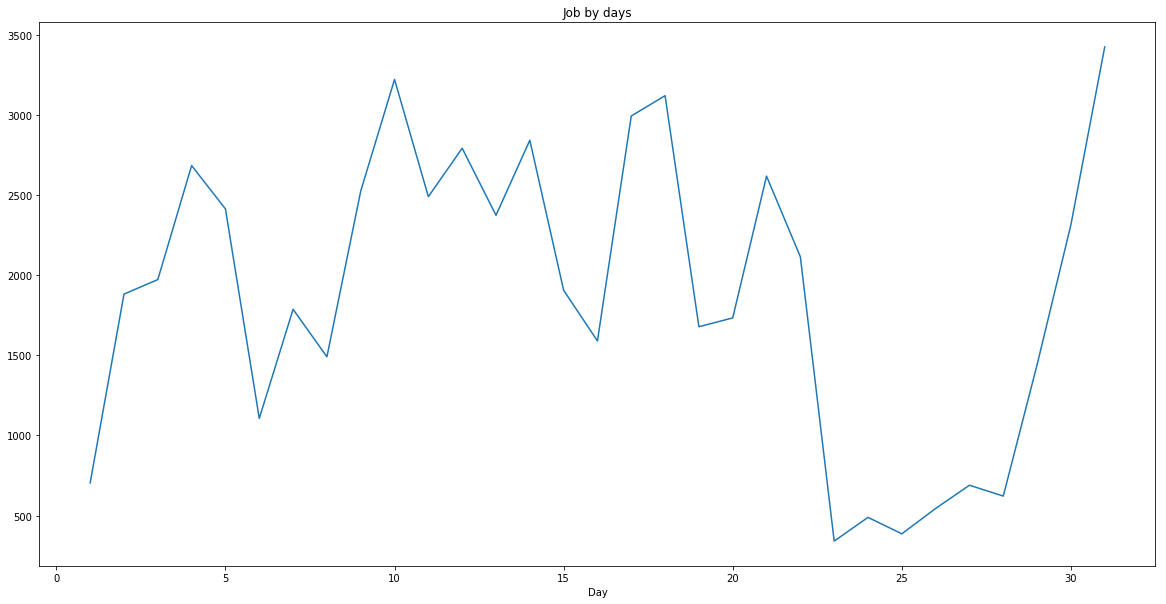

In [28]:
import matplotlib.pyplot as plt
new_df['Date'] = pd.to_datetime(new_df['Date'])

new_df['Day'] = new_df['Date'].dt.day
new_df['Month'] = new_df['Date'].dt.month

post_trend = pd.DataFrame(columns=['Count'])
post_trend['Count'] = new_df.groupby(['Day','Month'])['Company'].count()

post_trend_day = post_trend['Count'].groupby(['Day']).mean()
post_trend_day.plot.line(figsize=(20,10), title=('Job by days'))

        - According to above graph, at the first half month, the number of posting is pretty high. Howevever, since the 20th day, the number of posting is decrease and only grow back at the end of the month.
    
### 3) Study the market by sectors.
    ● Which sectors keep the highest market share? 

In [15]:
# Count the total cities of each sector available

sector = new_df[['Classification', 'Location']]
sector = sector.dropna()

table = pd.pivot_table(sector, columns=['Location'] ,index=['Classification'], aggfunc={'Location':'count'})
result = table.apply(lambda x: x.count(), axis=1)
result.sort_values(ascending = False).head(10)

Classification
Trades & Services                       65
Manufacturing, Transport & Logistics    65
Government & Defence                    65
Healthcare & Medical                    65
Farming, Animals & Conservation         64
Hospitality & Tourism                   64
Administration & Office Support         64
Community Services & Development        64
Engineering                             64
Retail & Consumer Products              64
dtype: int64

        - From above result, we can observe that "Trades & Services", "Manufacturing, Transport & Logistics", "Government & Defence" and "Healthcare & Medical" keep the highest market share with 65 cities for each.

    ● In each sector, which sub-sectors are the main spotlights?

In [16]:
sub_sector = new_df[['Classification', 'SubClassification']]
sub_sector = sub_sector.dropna()

table_sub = pd.pivot_table(sub_sector, columns=['SubClassification'] ,index=['Classification'], aggfunc={'SubClassification':'count'}, fill_value=0)

table_sub.idxmax(axis=1).head(10)

Classification
Accounting                          (SubClassification, Financial Accounting & Rep...
Administration & Office Support        (SubClassification, Administrative Assistants)
Advertising, Arts & Media              (SubClassification, Agency Account Management)
Banking & Financial Services                   (SubClassification, Compliance & Risk)
CEO & General Management            (SubClassification, General/Business Unit Mana...
Call Centre & Customer Service      (SubClassification, Customer Service - Call Ce...
Community Services & Development       (SubClassification, Aged & Disability Support)
Construction                                  (SubClassification, Project Management)
Consulting & Strategy               (SubClassification, Management & Change Consul...
Design & Architecture                               (SubClassification, Architecture)
dtype: object

        - Base on above result, each Sector will have main spotlights sub-sector. For example, with Accounting, its main sub-sector is Financial Accounting & Reporting, the rest sectors are the same.
        
    ● What is the salary range for each sector/sub-sector? Can you compare salary range between sectors/subsectors?

In [17]:
# Salary range for each sector
salary = df[['Classification', 'SubClassification', 'HighestSalary', 'LowestSalary']]
salary = salary.dropna()
salary['Range'] = salary['HighestSalary'] - salary['LowestSalary']

table_sector = pd.pivot_table(salary, columns=['Range'] ,index=['Classification'], aggfunc={'Range':'count'})
table_sector.describe()

Range                                                    
Range           10           20           30           50           799
count     30.000000    30.000000    30.000000    30.000000    30.000000
mean    2995.566667   994.600000  1774.733333   526.733333   282.666667
std     3347.711866   999.772202  1556.847587  1038.041589   662.723552
min       14.000000    35.000000    37.000000     5.000000     2.000000
25%      626.250000   221.750000   447.000000    55.000000    23.750000
50%     1636.500000   722.500000  1342.500000   232.500000   100.000000
75%     3884.750000  1767.500000  2421.250000   580.000000   246.000000
max    12370.000000  4099.000000  7207.000000  5650.000000  3452.000000

In [18]:
# Salary range for each sub-sector
table_sub = pd.pivot_table(salary, columns=['Range'] ,index=['SubClassification'], aggfunc={'Range':'count'})
table_sub.describe()

Range                                                   
Range          10           20           30           50          799
count   334.000000   325.000000   337.000000   286.000000  249.000000
mean    269.062874    91.809231   157.988131    55.251748   34.056225
std     558.233818   175.122551   276.119776   139.305267  100.788568
min       1.000000     1.000000     1.000000     1.000000    1.000000
25%      25.000000    11.000000    25.000000     3.000000    2.000000
50%      68.000000    35.000000    73.000000    12.000000    5.000000
75%     259.750000    93.000000   164.000000    38.750000   19.000000
max    5041.000000  1919.000000  3087.000000  1033.000000  795.000000

        - The SubClassification is the children of Classification, therefore the values inside Classification will be deivide into several SubClassifitions. That is the reason why the total count of sub-sector is larger than the sector, the the value inside such as min, max, 1st quarter, etc. is smaller than the sector. 
        
    ● What is the trending of market i.e. if a high school student ask you which subject should he/she learn in the university (to guarantee a job in a future), what is your advice?

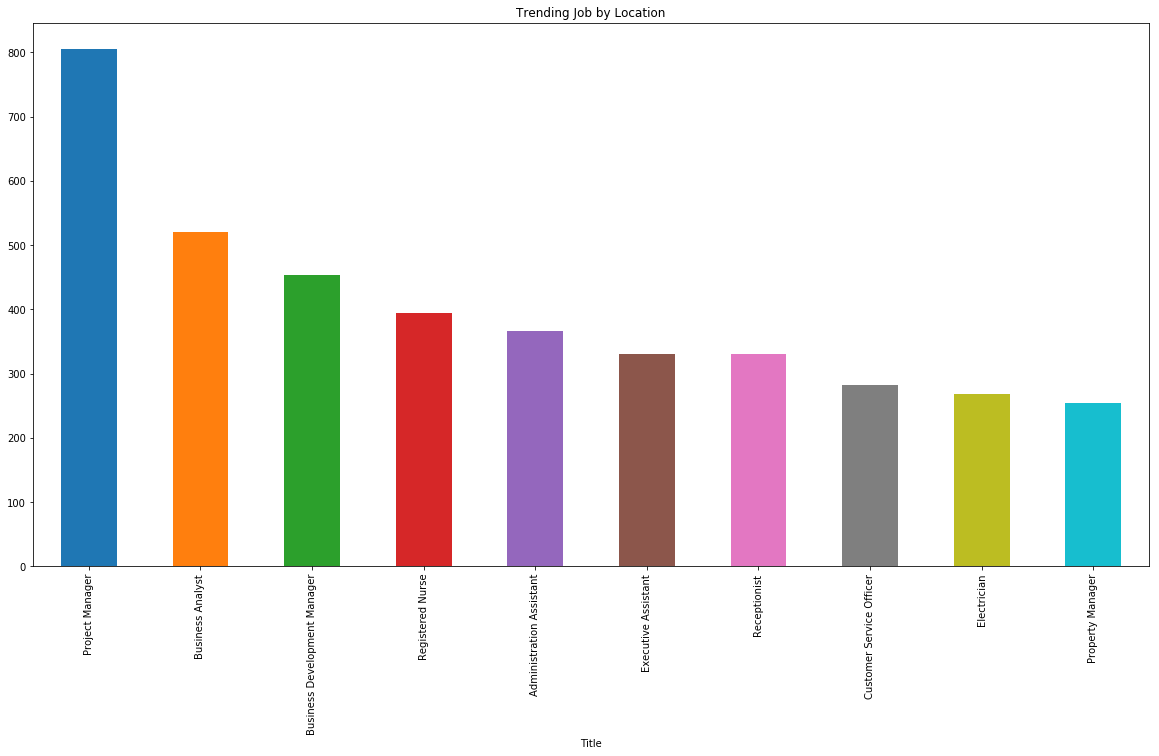

In [19]:
# Top 10 hottest job sex that student should learn
trending = df[['Title', 'Location', 'HighestSalary', 'LowestSalary', 'Classification']]
trending = trending.dropna()
trending['Range'] = trending['HighestSalary'] - trending['LowestSalary']

result_location = trending.groupby('Title')['Location'].count().sort_values(ascending = False).head(10)
result_location.plot(kind='bar', title = ('Trending Job by Location'), figsize = (20, 10))

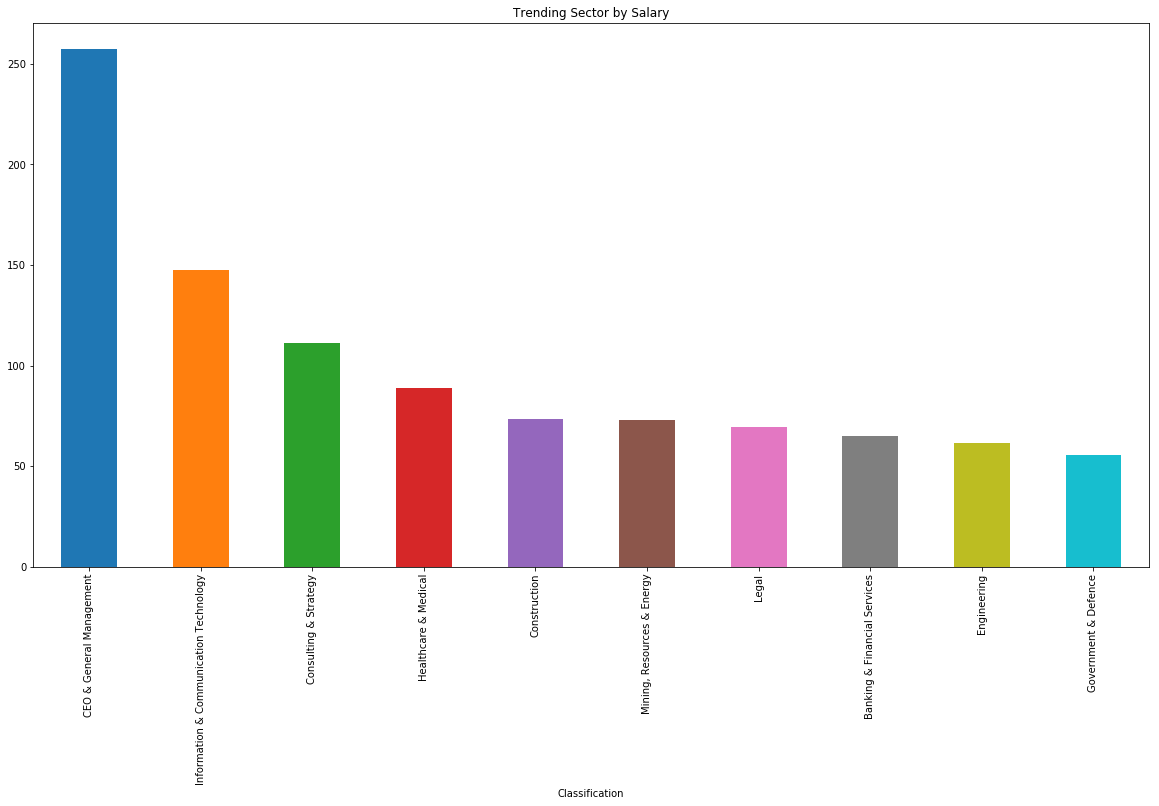

In [20]:
# Trending job sector base on Avarage Highest Salary
result_salary = trending.groupby('Classification')['Range'].mean().sort_values(ascending = False).head(10)
result_salary.plot(kind='bar', title = ('Trending Sector by Salary'), figsize = (20, 10))

       - From above graphs, student can decide which subject they can learn according to job market or average salary of each job sector. 
    
    ● Can you detect which skills are required in each sector?

In [21]:
skill = new_df[['Classification', 'Requirement']]
skill = skill.dropna()
result_skill = skill.groupby(['Classification', 'Requirement'])['Requirement'].count().sort_values(ascending = False).groupby(level=1).tail(1)
result_skill.head(10)

Classification              Requirement                                                                                                                                           
Education & Training        Teachers at range 1 are responsible for teaching their own classes and may also assist and participate in policy development, project teams and the...    83
Retail & Consumer Products  Do you love to shop? Do you love to tell others about your shopping experiences? Are you looking for extra income?                                        79
                            Our team differentiates itself from our competitors through the customer service we provide. Contribute to the store performance. Grow your career!       72
Education & Training        The classroom teacher classification comprises two salary ranges- range 1 and range 2. The primary focus of the classroom teacher is on the...            65
                            For the purpose of the Teacher Graduate Recruitment P

        - Above result show the requirement skills and the popularity of them for each sector.

### 4) Visualize the results on an interactive web page.
    ● Trend analysis: visualize number of jobs by locations, by sectors, etc. 

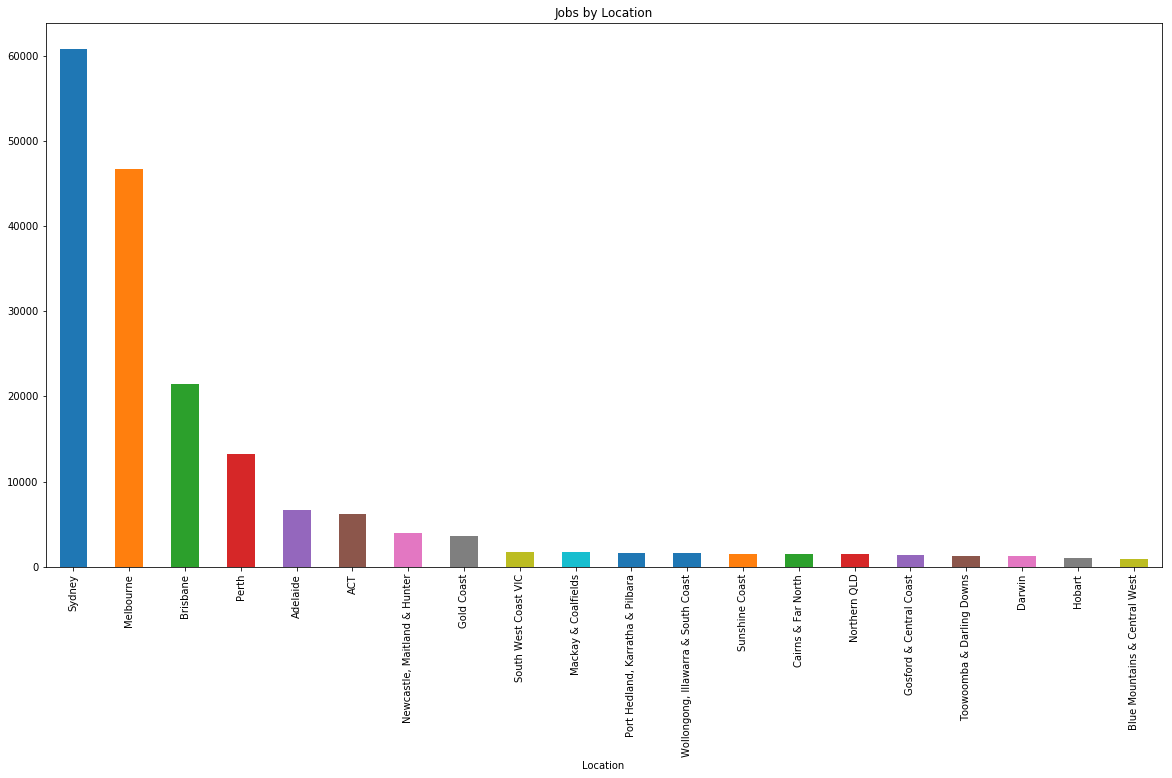

In [22]:
# Visualiza number of job by locations
vis = df[['Classification', 'Location', 'Date', 'HighestSalary', 'Title', 'LowestSalary']]
vis = vis.dropna()
vis['Range'] = vis['HighestSalary'] - vis['LowestSalary']

total_job_loc = vis.groupby('Location')['Title'].count().sort_values(ascending = False).head(20)
total_job_loc.plot.bar(figsize=(20, 10), title = ('Jobs by Location'))

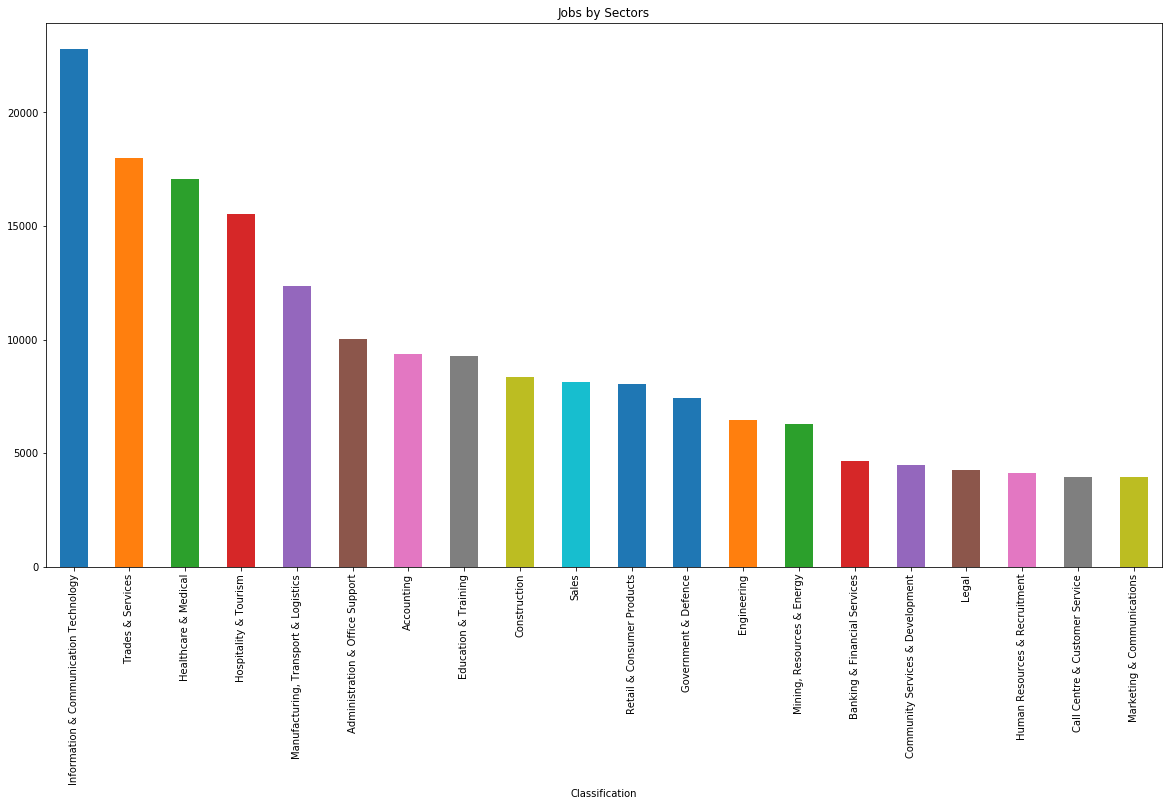

In [23]:
# Visualiza number of job by sector
total_job_sec = vis.groupby('Classification')['Title'].count().sort_values(ascending = False).head(20)
total_job_sec.plot.bar(figsize=(20, 10), title = ('Jobs by Sectors'))

    ● Compare between locations or sectors about the number of jobs, the salary, etc. 

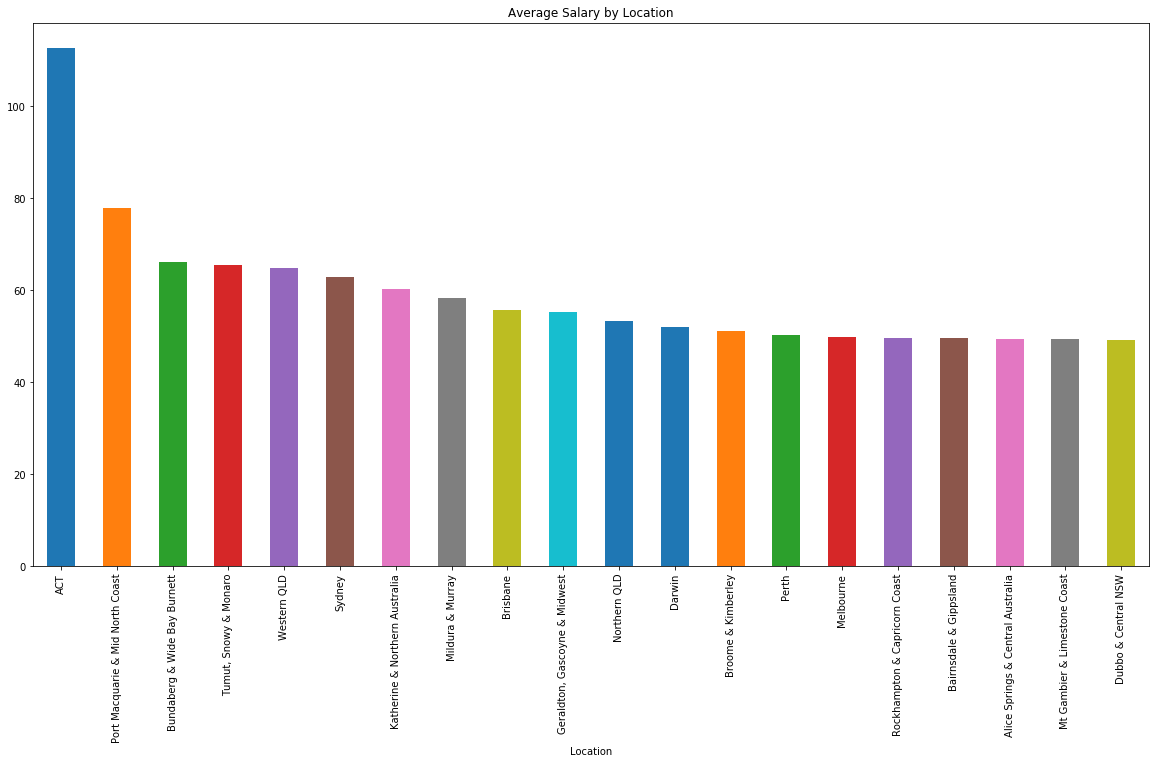

In [24]:
# Avarage Salary by Location
avg_sal_loc = vis.groupby('Location')['Range'].mean().sort_values(ascending=False).head(20)
avg_sal_loc.plot.bar(figsize=(20, 10), title = ('Average Salary by Location'))

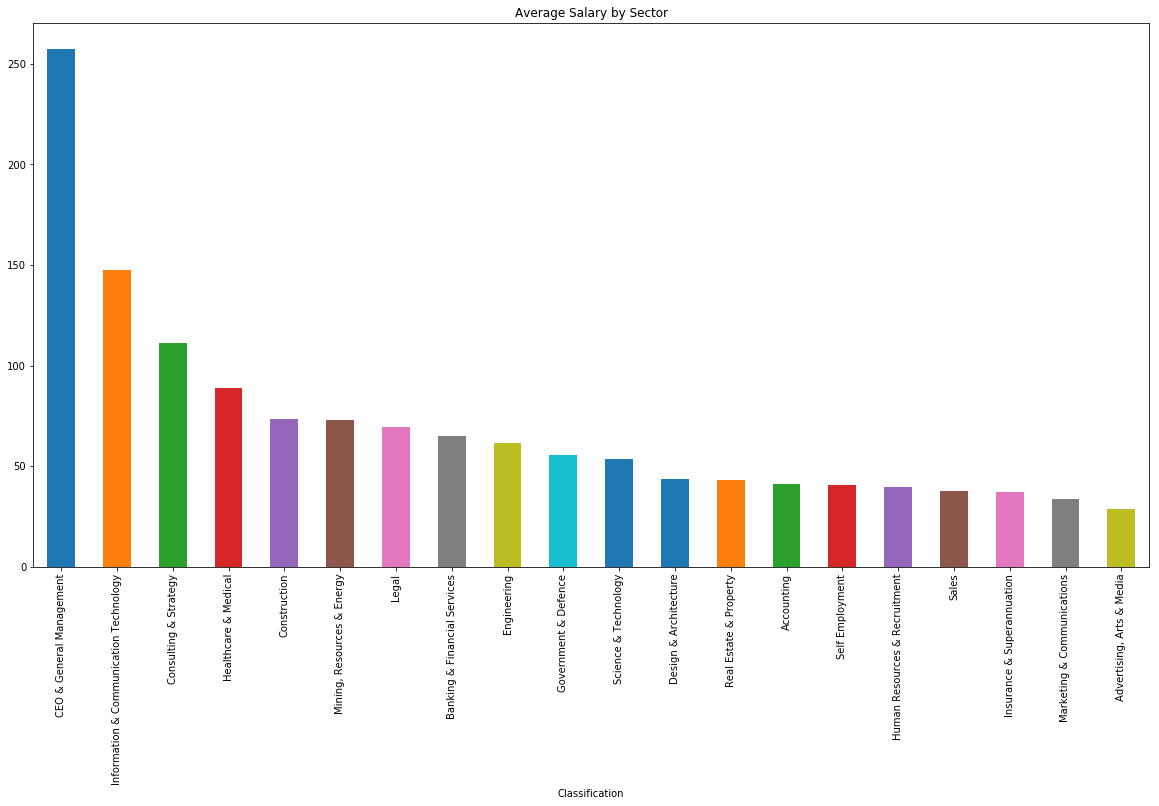

In [25]:
# Avarage Salary by Location
avg_sal_sec = vis.groupby('Classification')['Range'].mean().sort_values(ascending=False).head(20)
avg_sal_sec.plot.bar(figsize=(20, 10), title = ('Average Salary by Sector'))

        - From above "Jobs by Location" graph and "Average Salary by Location" graph, we can see that although Sydney is the place that has the highest number of jobs available, ACT is the city that has the highest average income.
        - The same thing happen with "Jobs by Sector" graph and "Average Salary by Sector" graph. While most of people forcus on "Information & Communication Techonology" or "Trade & Services", "CEO & General Manager" is the postion that receive the most salary.

    ● Present the necessary skills by sectors, by subsectors. 

In [26]:
# Skills by sector
skill = new_df[['Classification', 'SubClassification', 'Requirement']]
skill = skill.dropna()

result_skill_sec = skill.groupby(['Classification', 'Requirement'])['Requirement'].count().sort_values(ascending = False).groupby(level=1).tail(1)
result_skill_sec.head()

Classification              Requirement                                                                                                                                           
Education & Training        Teachers at range 1 are responsible for teaching their own classes and may also assist and participate in policy development, project teams and the...    83
Retail & Consumer Products  Do you love to shop? Do you love to tell others about your shopping experiences? Are you looking for extra income?                                        79
                            Our team differentiates itself from our competitors through the customer service we provide. Contribute to the store performance. Grow your career!       72
Education & Training        The classroom teacher classification comprises two salary ranges- range 1 and range 2. The primary focus of the classroom teacher is on the...            65
                            For the purpose of the Teacher Graduate Recruitment P

In [27]:
#Skills by sub-sector
result_skill_sub = skill.groupby(['SubClassification', 'Requirement'])['Requirement'].count().sort_values(ascending = False).groupby(level=1).tail(1)
result_skill_sub.head()

SubClassification      Requirement                                                                                                                                           
Other                  Do you love to shop? Do you love to tell others about your shopping experiences? Are you looking for extra income?                                        79
Retail Assistants      Our team differentiates itself from our competitors through the customer service we provide. Contribute to the store performance. Grow your career!       72
Bakers & Pastry Chefs  Experienced Baker dedicated to providing high quality products & service? Join a leading team & develop your career here! It's not all about the dough    55
Retail Assistants      Fuel your Career with us. We offer a fun and friendly work environment, training opportunities and great team member discounts.                           54
                       Exciting Christmas Casual opportunities now available at Review! Add some glamour t

### 5) Using PySpark for your data analysis
        - I give up on this one.
<br><br><br>
        
<i>                                                     Author:
<br>                                              Hoang Minh Khiem
<br>                                                Tran Anh Tuan
    
                                                     ~ END PART 2 ~